# Build system to detect sarcasm.


# Objective: -



The goal of this challenge is to build system to detect sarcasam





# Dataset: -

The dataset we are using for this task is available on kaggle. This data set contains article_link, headline, is_sarcastic. Fortunately, this dataset is labelled as 0 and 1, where 0 indicates no sarcasm and 1 indicates its sarcasm.



# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [ ]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity
import warnings




warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [ ]:
#loading the dataset
try:
    df = pd.read_json('/Users/amitpandey/Downloads/Sarcasm.json', lines=True) #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path") 
    
    data = pd.read_json("Sarcasm.json", lines=True)
    


Data read done successfully...


In [ ]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


After we read the data, we can look at the data using:

In [ ]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 26709 rows and 3 columns


#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [ ]:
df.shape

(26709, 3)

#### The df.shape method shows the shape of the dataset. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [ ]:
df.iloc[1]

article_link    https://www.huffingtonpost.com/entry/roseanne-...
headline        the 'roseanne' revival catches up to our thorn...
is_sarcastic                                                    0
Name: 1, dtype: object

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [ ]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [ ]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  2
There names are as follows:  ['article_link', 'headline']


In [ ]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [ ]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  1
There names are as follows:  ['is_sarcastic']


## Step 2 Insights: -

1) We have total 3 features where 2 of them are object type and 1 is int type.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

Things we are going to do in this step:


1. Null Values
2. NaN Values


![missing-values.png](attachment:missing-values.png)

# 1. NULL VALUES

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [ ]:
df.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

As we notice that there are no null values in our dataset.


# 2. NAN VALUES

![images.png](attachment:images.png)

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [ ]:
df.isna().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

### As we notice that there are no nan values in our dataset. 

In [ ]:
# We have many ways to fill Null/Nan Values as below:

* mean -> average value (for numerical)
* mode -> most repeated value (for categorical)

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

# Count of unique occurences of every value in all categorical value



In [ ]:
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

article_link https://www.huffingtonpost.comhttp://nymag.com/daily/intelligencer/2016/05/hillary-clinton-candidacy.html             2
https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5                                   1
https://www.huffingtonpost.com/entry/insane-as-todays-us-russia-situation-may-be-trump_us_58bc5763e4b02b8b584dfd11    1
https://www.huffingtonpost.com/entry/open-letter-white-supremacists_us_599b376be4b04c532f4392b4                       1
https://www.theonion.com/scientists-find-link-between-how-pathetic-you-are-how-1819575206                             1
                                                                                                                     ..
https://www.huffingtonpost.com/entry/amber-rose-son-gay-taylor-swift-trolls_us_5ab4ff30e4b008c9e5f68782               1
https://politics.theonion.com/obama-vows-to-split-isis-into-dozens-of-extremist-splin-1819576912                      1
https://www.huffingtonpost.

In [ ]:
#Not gonna use artcile link as it of no use to our model

In [ ]:
df = df[["headline", "is_sarcastic"]]

## Before moving to Data Preparation we need to set 'is_sarcastic' column labels as 0 and 1. 1 means Not Sarcasm, and 0 means Sarcasm

The “is_sarcastic” column in this dataset contains the labels that we have to predict for the task of sarcasm detection. It contains binary values as 1 and 0, where 1 means sarcastic and 0 means not sarcastic. So for simplicity, I will transform the values of this column as “sarcastic” and “not sarcastic” instead of 1 and 0:



In [ ]:
df["is_sarcastic"] = df["is_sarcastic"].map({0: "Not Sarcasm", 1: "Sarcasm"})


In [ ]:
df

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,Not Sarcasm
1,the 'roseanne' revival catches up to our thorn...,Not Sarcasm
2,mom starting to fear son's web series closest ...,Sarcasm
3,"boehner just wants wife to listen, not come up...",Sarcasm
4,j.k. rowling wishes snape happy birthday in th...,Not Sarcasm
...,...,...
26704,american politics in moral free-fall,Not Sarcasm
26705,america's best 20 hikes,Not Sarcasm
26706,reparations and obama,Not Sarcasm
26707,israeli ban targeting boycott supporters raise...,Not Sarcasm


# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will separate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Model Training




### 1. Now we will separate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Separate target and feature column in X and y variable

# X will be the features
X = np.array(df["headline"])

# y will be the target variable
y = np.array(df["is_sarcastic"])



In [ ]:
X


array(["former versace store clerk sues over secret 'black code' for minority shoppers",
       "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
       "mom starting to fear son's web series closest thing she will have to grandchild",
       ..., 'reparations and obama',
       'israeli ban targeting boycott supporters raises alarm abroad',
       'gourmet gifts for the foodie 2014'], dtype=object)

In [ ]:
y

array(['Not Sarcasm', 'Not Sarcasm', 'Sarcasm', ..., 'Not Sarcasm',
       'Not Sarcasm', 'Not Sarcasm'], dtype=object)

In [ ]:
# Check the shape of X and y variable
X.shape, y.shape

((26709,), (26709,))

### 2. Split dataset into train and test dataset.

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.


In the next step we will train our model on the basis of our training and testing data.


# Step 3: Model Training

#### Goal:In this step we are going to train our dataset on different algorithms. 

In this step we are going to train our dataset on different classification algorithms. As we know that our target variable is in discrete format so we have to apply classification algorithm. Target variable is a category like filtering.In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values either 0: "Not Sarcasm" or 1: "Sarcasm". So we will use Classification algorithm**

Algorithms we are going to use in this step

1. Bernoulli Naive Bayes
2. Linear SVC
3. Random Forest Classification

 K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn




In [ ]:
# Define kfold with 10 split
cv1 = KFold(n_splits=10, shuffle=True, random_state=42)


The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. Bernoulli Naive Bayes

Naive Bayes is a supervised machine learning algorithm to predict the probability of different classes based on numerous attributes. It indicates the likelihood of occurrence of an event. Naive Bayes is also known as conditional probability.
Bernoulli Naive Bayes is a part of the Naive Bayes family. It is based on the Bernoulli Distribution and accepts only binary values, i.e., 0 or 1. If the features of the dataset are binary, then we can assume that Bernoulli Naive Bayes is the algorithm to be used.


### Train set cross-validation

In [ ]:
#Using Bernoulli Naive Bayes algorithm to the Training Set
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()

BNB.fit(X_train, y_train)

BernoulliNB()

In [ ]:
#Accuracy check of trainig data

#Get R2 score
BNB.score(X_train, y_train)


0.9310980720871752

In [ ]:
#Accuracy check of trainig data

#Get R2 score
BNB.score(X_test, y_test)


0.8463807578851826

#### Prediction
Now we will perform prediction on the dataset using Linear Regression.

In [ ]:
# Predict the values on X_test_scaled dataset 
y_predicted = BNB.predict(X_test)

### Various parameters are calculated for analysing the predictions.
1) Confusion Matrix 2) Classification Report 3) Accuracy Score 4) Precision Score 5) Recall Score 6) F1 Score

# Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

![confuse.png.webp](attachment:confuse.png.webp)

This diagram helps in understanding the concept of confusion matrix.

In [ ]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [ ]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)



Text(21.5, 0.5, 'True Class')

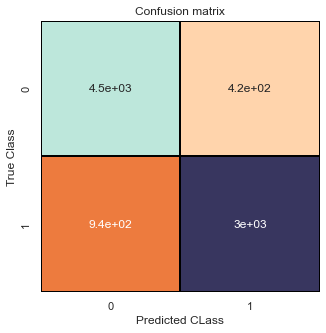

In [ ]:
#We are creating Confusion Matrix on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm,cmap = 'icefire_r', annot = True, cbar=False, linecolor='Black', linewidth = 2)

plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

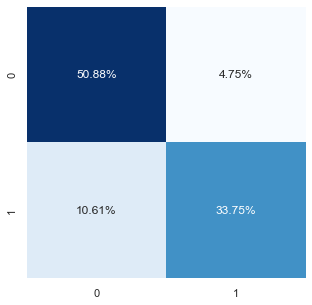

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

# Evaluating all kinds of evaluating parameters.

#### Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.

#### F1_score :
The F1 score is a machine learning metric that can be used in classification models.

#### Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is  Bernoulli Naive Bayes")
  
l_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(l_acc))
  
prec = precision_score(y_test, y_predicted,average="binary", pos_label="Sarcasm")
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted,average="binary", pos_label="Sarcasm")
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted,average="binary", pos_label="Sarcasm")
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)

The model used is  Bernoulli Naive Bayes

The accuracy is: 0.8463807578851826
The precision is: 0.8765468473777254
The recall is: 0.7608695652173914
The F1-Score is: 0.8146221248630887
Classification Report is:

              precision    recall  f1-score   support

 Not Sarcasm       0.83      0.91      0.87      4904
     Sarcasm       0.88      0.76      0.81      3910

    accuracy                           0.85      8814
   macro avg       0.85      0.84      0.84      8814
weighted avg       0.85      0.85      0.84      8814



# 2. Linear SVC

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is. This makes this specific algorithm rather suitable for our uses, though you can use this for many situations.

In [ ]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train, y_train)

LinearSVC()

In [ ]:
#Accuracy check of trainig data
#Get R2 score
classifier.score(X_train, y_train)

0.997652975691534

In [ ]:
#Accuracy check of test data
#Get R2 score
classifier.score(X_test, y_test)

0.8232357612888587

#### Prediction
Now we will perform prediction on the dataset using Linear SVC.


In [ ]:
# Predict the values on X_test_scaled dataset 
y_predicted = classifier.predict(X_test)


# Various parameters are calculated for analysing the predictions.
1) Confusion Matrix 2) Classification Report 3) Accuracy Score 4) Precision Score 5) Recall Score 6) F1 Score


# Confusion Matrix
A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

In [ ]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [ ]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(21.5, 0.5, 'True Class')

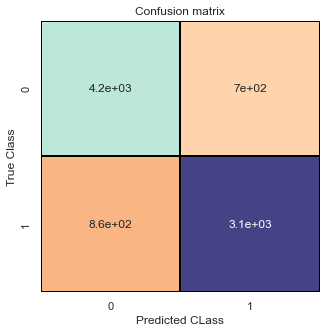

In [ ]:
#We are creating Confusion Matrix on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm,cmap = 'icefire_r', annot = True, cbar=False, linecolor='Black', linewidth = 2)

plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

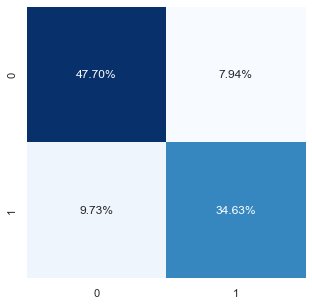

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

# Evaluating all kinds of evaluating parameters.


In [ ]:

# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix  
print("The model used is LinearSVC")  

k_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(k_acc))  

prec = precision_score(y_test, y_predicted,average="binary", pos_label="Sarcasm")
print("The precision is: {}".format(prec))  

rec = recall_score(y_test, y_predicted,average="binary", pos_label="Sarcasm")
print("The recall is: {}".format(rec))  

f1 = f1_score(y_test, y_predicted,average="binary", pos_label="Sarcasm")
print("The F1-Score is: {}".format(f1))  

c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)    

The model used is LinearSVC

The accuracy is: 0.8232357612888587
The precision is: 0.8134328358208955
The recall is: 0.7805626598465473
The F1-Score is: 0.7966588358131037
Classification Report is:

              precision    recall  f1-score   support

 Not Sarcasm       0.83      0.86      0.84      4904
     Sarcasm       0.81      0.78      0.80      3910

    accuracy                           0.82      8814
   macro avg       0.82      0.82      0.82      8814
weighted avg       0.82      0.82      0.82      8814



# 3. Random Forest Classifier

Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems in R and Python. Random Forest and Decision Tree Algorithm are considered best for the data that has outliers.

In [ ]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
#clas = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clas = RandomForestClassifier()
clas.fit(X_train, y_train)

In [ ]:
#Accuracy check of trainig data
#Get R2 score
clas.score(X_train, y_train)

In [ ]:
#Accuracy check of test data
#Get R2 score
clas.score(X_test, y_test)

#### Prediction
Now we will perform prediction on the dataset using Linear SVC.


In [ ]:


# Predict the values on X_test_scaled dataset 
y_predicted = clas.predict(X_test)

# Various parameters are calculated for analysing the predictions.
1) Confusion Matrix 2) Classification Report 3) Accuracy Score 4) Precision Score 5) Recall Score 6) F1 Score


# Confusion Matrix
A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

# Evaluating all kinds of evaluating parameters.


In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix  
print("The model used is Random Forest Classifier ")  

r_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(k_acc))  

prec = precision_score(y_test, y_predicted,average="binary", pos_label="Sarcasm")
print("The precision is: {}".format(prec))  

rec = recall_score(y_test, y_predicted,average="binary", pos_label="Sarcasm")
print("The recall is: {}".format(rec))  

f1 = f1_score(y_test, y_predicted,average="binary", pos_label="Sarcasm")
print("The F1-Score is: {}".format(f1))  

c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)    

# Insight: -

In [ ]:

cal_metric=pd.DataFrame([l_acc,k_acc,r_acc],columns=["Score in percentage"])
cal_metric.index=['Bernoulli Naive Bayes','LinearSVC','Random Forest']


cal_metric

* As you can see with our Bernoulli Naive Bayes(84.63%) we are getting a better result even for the recall (0.91 or 91%) which is the most tricky part.
* So we gonna save our model with Bernoulli Naive Bayes Model

# Step 4: Save Model


#### Goal:- In this step we are going to save our model in pickel format file.

In [ ]:
import pickle 
pickle.dump(BNB, open("Sarcasm_Detection_BernoulliNB.pkl", 'wb'))

In [ ]:
pickle.dump(classifier, open("Sarcasm_Detection_LinearSVC.pkl", 'wb'))

In [ ]:
pickle.dump(clas, open("Sarcasm_Detection_RandomForest.pkl", 'wb'))

In [ ]:
import pickle

def model_prediction(features):
    features = cv.transform([features]).toarray()
    pickled_model = pickle.load(open('Sarcasm_Detection_BernoulliNB.pkl', 'rb'))
    Message = str(list(pickled_model.predict(features)))
    
    return str(f'The Message is {Message}')


In [ ]:
Message = "Cows lose their jobs as milk prices drop"

In [ ]:
Message_2 = "Hi"

In [ ]:
model_prediction(Message)

In [ ]:
model_prediction(Message_2)

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to overcome it. This is how you can train a sarcasm detection model to detect sarcasm. 
